# Project: The Movie Database (TMDB) Analysis


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this notebook, we analyze a dataset from The Movie Database (TMDb) that provides detailed information on 10,000 movies, including genres, revenue figures, user ratings, cast details, and more. Our objective is to uncover subtle insights into the evolution of genre popularity, the factors that most strongly correlate with box office success, and the potential impact of movie runtime on both revenue and popularity. For this exploration, we rely solely on the pandas and NumPy libraries for data manipulation and analysis.

### Question(s) for Analysis
- What patterns emerge in genre popularity across different release years, and how might these trends reflect changes in audience preferences over time?

- Which factors—such as budget, vote average, and popularity—have the strongest correlation with a movie’s box office performance?

- Is there a discernible relationship between a movie’s runtime and its overall success in terms of revenue and audience reception?

In [1]:
import pandas as pd
import numpy as np


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### Loading the dataset

In [2]:
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
pd.set_option('display.max_columns', None)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Overview of the dataset size and structure 

In [3]:
df.shape


(10866, 21)

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

We can see that there are null values in several columns, since some of these columns are non-essential for our analysis (like homepage, tagline, and overview), we will drop them. For other columns like genres and director, we will either fill the missing values or drop affected rows. In addition to addressing missing data, we will remove movies that have zero or unrealistic budgets or revenues, as these entries might skew our financial analysis. Finally, we will convert multi-value columns (such as genres, cast, keywords, and production companies), which are currently represented as pipe-separated strings, into lists to enable more granular analysis, and get rid of duplicated elements if there are any.

### Data Cleaning

In [6]:
# Drop non-essential columns
df.drop(['homepage', 'tagline', 'overview'], axis = 1, inplace = True)

In [7]:
# Check for any duplicated elements.
df.duplicated().sum()

1

In [8]:
# We can see there is one duplicated element, let's drop it
df.drop_duplicates(inplace = True)

In [9]:
# Drop rows since ID is a unique identifier 
df.dropna(subset = ['imdb_id'], inplace = True)

In [10]:
# Fill with "unknown" to maintain data integrity
incomp_columns = ['cast', 'director', 'genres', 'keywords', 'production_companies']
df[incomp_columns] = df[incomp_columns].fillna("unknown")

In [11]:
# Fill missing runtime values with the median
df['runtime'].fillna(df['runtime'].median(), inplace = True)

In [12]:
# Remove movies with zero or unrealistic budgets or revenues
df = df[(df['budget'] > 0) & (df['revenue'] > 0)]

In [13]:
# Convertion function
def to_list(s):
    if pd.isna(s) or s == 'Unknown':
        return []
    else:
        return s.split('|')

In [14]:
# Converting the columns into lists
df['genres'] = df['genres'].apply(to_list)
df['cast'] = df['cast'].apply(to_list)
df['keywords'] = df['keywords'].apply(to_list)
df['production_companies'] = df['production_companies'].apply(to_list)


In [15]:
# Confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3854 non-null   int64  
 1   imdb_id               3854 non-null   object 
 2   popularity            3854 non-null   float64
 3   budget                3854 non-null   int64  
 4   revenue               3854 non-null   int64  
 5   original_title        3854 non-null   object 
 6   cast                  3854 non-null   object 
 7   director              3854 non-null   object 
 8   keywords              3854 non-null   object 
 9   runtime               3854 non-null   int64  
 10  genres                3854 non-null   object 
 11  production_companies  3854 non-null   object 
 12  release_date          3854 non-null   object 
 13  vote_count            3854 non-null   int64  
 14  vote_average          3854 non-null   float64
 15  release_year        

<a id='eda'></a>
## Exploratory Data Analysis

> In this section, we will address the research question and compute the relevant statistics to support our analysis.
### Genre Trends by Year
This section explores how the popularity of movie genres has changed over time. Our approach involves exploding the multi-value genres column, identifying the top genres, grouping the data by release year and genre, and then visualizing the trends.



In [16]:
# Explode genres into columns, so we can group by genre later 
df_exploded  = df.explode('genres')

# Remove any rows with empty genres
df_exploded  = df_exploded [df_exploded ['genres'] != '']

In [17]:
# Identify the top genres
genre_count = df_exploded['genres'].value_counts()

# Select the top 5
top_5 = genre_count.index[:5].tolist()

print("Top 5 Genres", top_5)

Top 5 Genres ['Drama', 'Comedy', 'Thriller', 'Action', 'Adventure']


In [18]:
# Filter the top 5 genres
df_top = df_exploded[df_exploded['genres'].isin(top_5)]

In [19]:
# How many movies of each genre were released in each year
genre_year = df_top.groupby(['release_year', 'genres']).size().reset_index(name='count')

In [20]:
# Turn into a more convenient table format 
pivot_genre = genre_year.pivot(index='release_year', columns='genres', values='count').fillna(0)

Text(0, 0.5, 'Number of Movies')

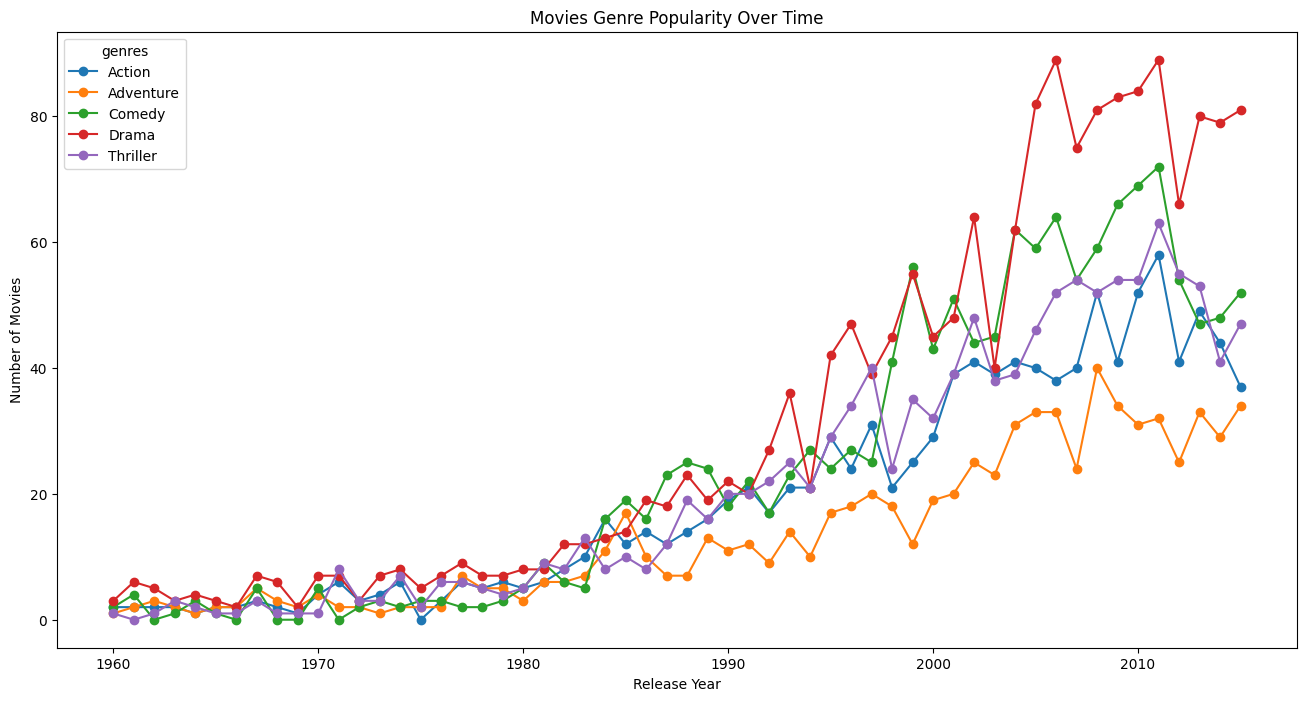

In [21]:
# A line plot for genre trend over time 
trends_plot = pivot_genre.plot(kind = 'line', figsize = (16,8), marker = 'o', title='Movies Genre Popularity Over Time')
trends_plot.set_xlabel("Release Year")
trends_plot.set_ylabel("Number of Movies")

> We can see that the genre "Drama" has consistently remained the most popular, with a noticeable increase in the last 20 years, we also notice a fall in "Comedy" popularity in recent years.

Now, let's examine the genre distribution for a specific year. I'll choose 2013, one of my favorite years for movies.

<AxesSubplot: title={'center': 'Genre Distribution in 2013'}, ylabel='genres'>

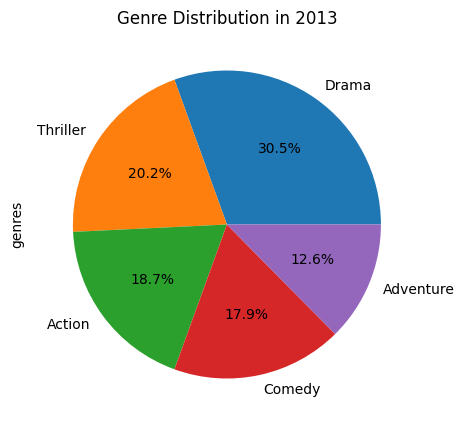

In [22]:
df_2013 = df_top[df_top['release_year'] == 2013]

# Count movies per genre for that year
genre_dist_2013 = df_2013['genres'].value_counts()

genre_dist_2013.plot(kind='pie',  autopct='%1.1f%%', figsize=(10, 5), title=f'Genre Distribution in 2013')

### Box Office Performance Correlations
In this section, we analyze which factors—such as budget, vote average, and popularity—are most strongly correlated with a movie’s revenue.

In [23]:
# Select the relevant columns
cols = ['budget', 'vote_average', 'popularity', 'revenue']
df_corr = df[cols]

In [24]:
# Compute the correlation matrix and display them
corr_matrix = df_corr.corr()
print(corr_matrix)

                budget  vote_average  popularity   revenue
budget        1.000000      0.024169    0.446987  0.688556
vote_average  0.024169      1.000000    0.317866  0.227123
popularity    0.446987      0.317866    1.000000  0.615535
revenue       0.688556      0.227123    0.615535  1.000000


In [25]:
# Extract correlation values with revenue, sorted by strength
corr_with_revenue = corr_matrix['revenue'].abs().sort_values(ascending = False)
print(corr_with_revenue)

revenue         1.000000
budget          0.688556
popularity      0.615535
vote_average    0.227123
Name: revenue, dtype: float64


<AxesSubplot: title={'center': 'Popularity vs. Revenue'}, xlabel='popularity', ylabel='revenue'>

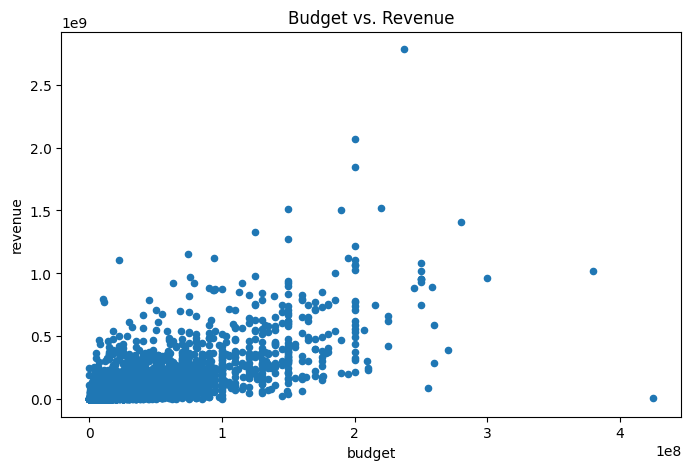

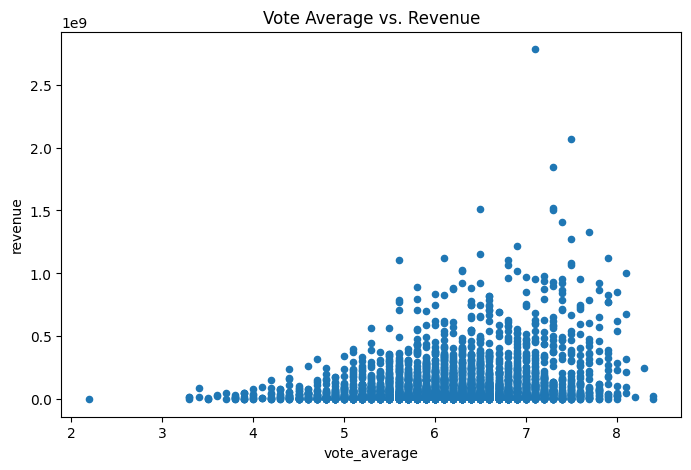

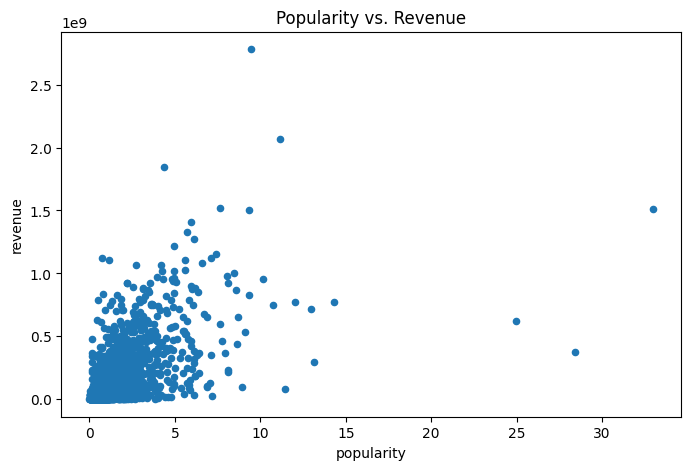

In [26]:
# Visualization
df.plot(x='budget', y='revenue', kind='scatter', title='Budget vs. Revenue', figsize=(8,5))
df.plot(x='vote_average', y='revenue', kind='scatter', title='Vote Average vs. Revenue', figsize=(8,5))
df.plot(x='popularity', y='revenue', kind='scatter', title='Popularity vs. Revenue', figsize=(8,5))


> We can see that budget and popularity are the strongest predictors of box office performance, while audience ratings have a much weaker influence. This suggests that a well-funded and well-marketed movie is more likely to succeed financially, regardless of its critical reception.

### Runtime & Success
In this section, we analyze the relationship between a movie’s runtime and its success. By analyzing key metrics such as revenue, vote average, and popularity.

In [27]:
# Select relevant columns
cols_r = ['runtime', 'revenue', 'vote_average', 'popularity']
df_runtime = df[cols_r]

In [28]:
# Compute the correlation matrix for runtime and success metrics
corr_matrix_run = df_runtime.corr()
print(corr_matrix_run)

               runtime   revenue  vote_average  popularity
runtime       1.000000  0.250298      0.351712    0.215092
revenue       0.250298  1.000000      0.227123    0.615535
vote_average  0.351712  0.227123      1.000000    0.317866
popularity    0.215092  0.615535      0.317866    1.000000


<AxesSubplot: title={'center': 'Runtime vs. Popularity'}, xlabel='runtime', ylabel='popularity'>

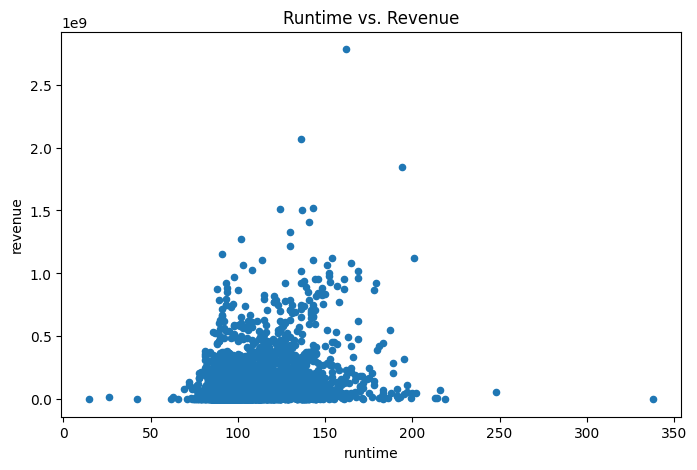

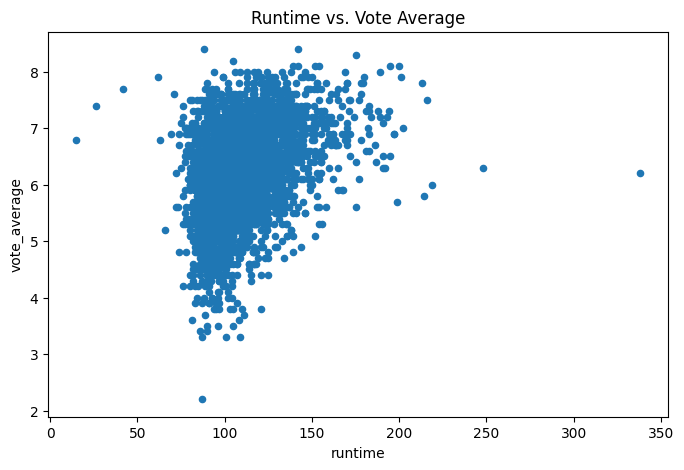

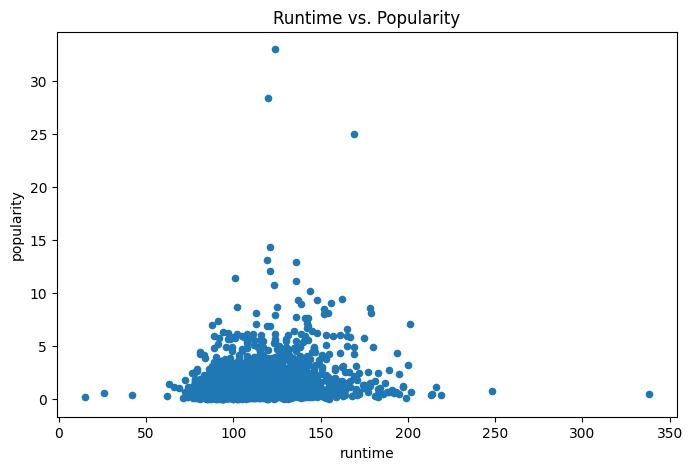

In [29]:
# Scatter plot: Runtime vs Revenue
df_runtime.plot(x='runtime', y='revenue', kind='scatter', figsize=(8,5),
                title='Runtime vs. Revenue')

# Scatter plot: Runtime vs Vote Average
df_runtime.plot(x='runtime', y='vote_average', kind='scatter', figsize=(8,5),
                title='Runtime vs. Vote Average')

# Scatter plot: Runtime vs Popularity
df_runtime.plot(x='runtime', y='popularity', kind='scatter', figsize=(8,5),
                title='Runtime vs. Popularity')

>Overall, runtime appears to have a modest relationship with success metrics like revenue and audience reception, whereas popularity shows a much stronger association with revenue. It's important to note that correlation does not imply causation, so while these associations exist, they don't necessarily mean that a longer runtime causes higher revenue or better ratings.

## Limitations

While this analysis provides valuable insights into movie trends and box office performance, there are several limitations to consider:

- **Missing and Incomplete Data**: Some columns, such as `cast`, `director`, and `genres`, had missing values, which were filled with "Unknown." This may introduce bias in the analysis, as missing data could represent a specific pattern (e.g., smaller or independent films).
  
- **Budget and Revenue Issues**: A significant number of movies had zero or unrealistic budget/revenue values. These entries were removed, but this may have skewed the dataset, potentially omitting low-budget or independent films.

- **Popularity and Vote Count Bias**: The `popularity` and `vote_average` metrics come from TMDb and may not be fully representative of a movie's true audience reception. High vote counts might favor recent releases or well-marketed films.

- **Lack of External Factors**: Our analysis focuses only on the dataset's internal features. It does not consider external factors such as marketing budgets, critical reviews, competition from other releases, or global events that could influence box office success.


<a id='conclusions'></a>
## Conclusions
In conclusion, genre trends reveal that "Drama" has consistently dominated in popularity, while "Comedy" has seen a decline in recent years. Box office performance is most strongly influenced by budget and popularity, with critical reception playing a lesser role. While runtime shows a modest connection to revenue and audience reception, popularity remains a key driver of financial success.